#Deep Learning con Python
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

In [ ]:
#librerias
%tensorflow_version 2.x 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [ ]:
#obtener los datos
dataset_path = tf.keras.utils.get_file("auto-mpg.data", 
                                       "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data") 

column_names = ['MPG','Cylinders','Displacement', 'Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']

raw_dataset=pd.read_csv(dataset_path,names=column_names,na_values="?", #leemos los datos y le damos las columnas
                        comment="\t",sep=" ",skipinitialspace=True)
dataset=raw_dataset.copy() #copiamos
dataset.tail() #ultimos 5 datos

32768/30286 [================================] - 0s 1us/step


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
print(dataset.isna().sum()) #si faltan valores, faltan 6 valores en HorsePower
dataset = dataset.dropna() #borramos esas filas (esto no se debe hacer en ejemplos reales)
print(dataset.isna().sum()) 

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [ ]:
#Origin es categorico, por lo que se realizara la estrategia one-shot
origin=dataset.pop('Origin')
dataset['Usa']=(origin==1)*1.0
dataset['Europe']=(origin==2)*1.0
dataset['Japan']=(origin==3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Usa,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
#Separamos los datos 
train_dataset=dataset.sample(frac=0.8,random_state=0) #80% de los datos
test_dataset=dataset.drop(train_dataset.index) #20% de los datos
#etiquetas
train_labels=train_dataset.pop('MPG')
test_labels=test_dataset.pop('MPG')

print(train_dataset.shape[0])
print(test_dataset.shape[0])
print(train_dataset.shape)
print(test_dataset.shape)

314
78
(314, 9)
(78, 9)


In [ ]:
#veamos como son los datos
train_stats=train_dataset.describe() #vemos las medianas y desviaciones
train_stats=train_stats.transpose() #transponemos la matriz
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Usa,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
#funcion de normalizacion
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

#verficamos la normalizacion
normed_train_stats = normed_train_data.describe().transpose() 
normed_train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,2.093159e-16,1.0,-1.457657,-0.869348,-0.869348,1.483887,1.483887
Displacement,314.0,1.018294e-16,1.0,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Horsepower,314.0,-1.909301e-17,1.0,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Weight,314.0,-9.723291e-17,1.0,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Acceleration,314.0,2.688832e-15,1.0,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Model Year,314.0,9.561531e-16,1.0,-1.604642,-0.788458,0.027726,0.843910,1.660094
Usa,314.0,6.081476e-17,1.0,-1.286751,-1.286751,0.774676,0.774676,0.774676
Europe,314.0,8.485781e-18,1.0,-0.465148,-0.465148,-0.465148,-0.465148,2.143005
Japan,314.0,3.164489e-17,1.0,-0.495225,-0.495225,-0.495225,-0.495225,2.012852


In [ ]:
#modelo de la red
def build_model():
  model=Sequential()
  model.add(Dense(64,activation='relu',
                  input_shape=[len(train_dataset.keys())]))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1))
  return model
  
model=build_model();
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#funcion de perdida
#MSE mean square error o MAE mean absolute error
optimizer=tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae','mse'])
#para evitar el sobreajuste visto abajo añadimos un callback EarlyStopping
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
#entrenamiento
epochs=1000  #1000 sobreajuste obvio
history=model.fit(normed_train_data,train_labels,
                  epochs=epochs,validation_split=0.2, #validation 20% de los datos
                  verbose=1,callbacks=[early_stop]) 

Epoch 1/1000
8/8 [==============================] - 0s 47ms/step - loss: 549.7226 - mae: 22.1602 - mse: 549.7226 - val_loss: 535.2636 - val_mae: 21.8067 - val_mse: 535.2636
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 490.3993 - mae: 20.8375 - mse: 490.3993 - val_loss: 470.9962 - val_mae: 20.3260 - val_mse: 470.9962
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 428.7537 - mae: 19.3606 - mse: 428.7537 - val_loss: 400.3554 - val_mae: 18.5754 - val_mse: 400.3554
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 362.7785 - mae: 17.6491 - mse: 362.7785 - val_loss: 328.2567 - val_mae: 16.5963 - val_mse: 328.2567
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 296.2765 - mae: 15.7322 - mse: 296.2765 - val_loss: 256.7814 - val_mae: 14.4390 - val_mse: 256.7814
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 230.3720 - mae: 13.6769 - mse: 230.3720 - val_loss: 189.2626 - val_

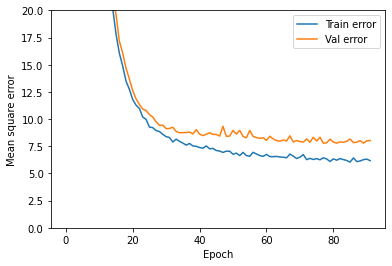

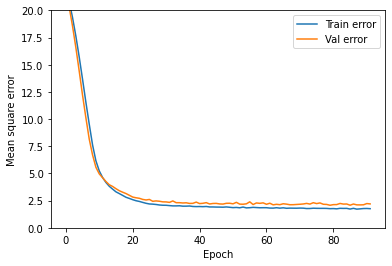

In [ ]:
#gracias a history podemos ver como el modelo a evolucionado
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

#graficamente 
def plot_history(history,param='mse'):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean square error')
  plt.plot(hist['epoch'],hist[f'{param}'],label='Train error')  #error del conjunto de  entrenamiento
  plt.plot(hist['epoch'],hist[f'val_{param}'],label='Val error') #eror del conjunto de validacion
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)
plot_history(history,'mae')
  

In [ ]:
#evaluacion del modelo de los datos
loss, mse, mae = model.evaluate(normed_test_data, test_labels) 
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae)) 
print("Testing set Mean Sqr Error: {:5.2f} MPG".format(mse)) 

#arroja un error de 5 millas por galon, un error pequeño, por lo que puede estar generalizando bien

3/3 [==============================] - 0s 2ms/step - loss: 5.4327 - mae: 1.7715 - mse: 5.4327
Testing set Mean Abs Error:  5.43 MPG
Testing set Mean Sqr Error:  1.77 MPG
